In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

crime_df = pd.read_csv('crime_data.csv')

<Axes: >

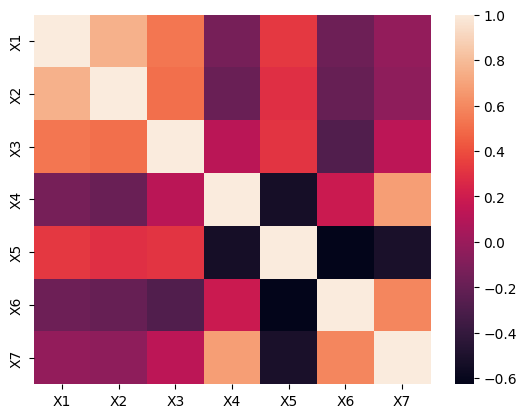

In [3]:
# For multiple linear regression (and other models), we need to use
# variables that are as UNCORRELATED WITH EACH OTHER as possible.

correlation = crime_df.corr()
sns.heatmap(correlation)

In [17]:
X = crime_df[['X2', 'X5']]
y = crime_df['X1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

# You want to do one correlated strongly with X1, then another strongly correlated with
# that original, except not with your first choise.

In [7]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = regression.predict(X_test)
y_pred

array([1150.14172271,  480.45104191,  818.19106585, 1227.55813262,
        793.59725046,  412.11636809,  952.72799954,  460.13293182,
        691.73054259,  632.98594097,  889.21046849,  563.51330147,
       2349.69377312,  943.34788205, 1017.92493373])

In [19]:
accuracy_score = regression.score(X_test, y_test)
accuracy_score

0.40491214090185157

In [20]:
regression.coef_ # Produces coeffecients in exact same way ^^ we passed them in.

array([0.53032549, 5.18172689])

x1 = 0.53*x2 + 5.1*x5

# OLS Regression:

OLS (Ordinary Least Squares) Regression is a type of linear regression that lets you handle interactions as well as features that don't have interactions.
- Incorporate features that ARE correlated with each other (unlike above)
- NOT good for predicting binary (discrete, in our case 0 = have diabetes vs 1 = don't)

In [23]:
! pip3 install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [24]:
from statsmodels.formula.api import ols
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [31]:
diabetes_vs_glucose = ols("Outcome ~ Glucose", data = diabetes_df).fit()
print(diabetes_vs_glucose.params)

# Split it out into variables:
intercept, slope = diabetes_vs_glucose.params # To easily plug into y/x

Intercept   -0.492495
Glucose      0.006960
dtype: float64


Outcome = 0.006960(Glucose) - 0.492495 ???
- uhhhh... wouldn't really work here because can't predict "0" or "1"

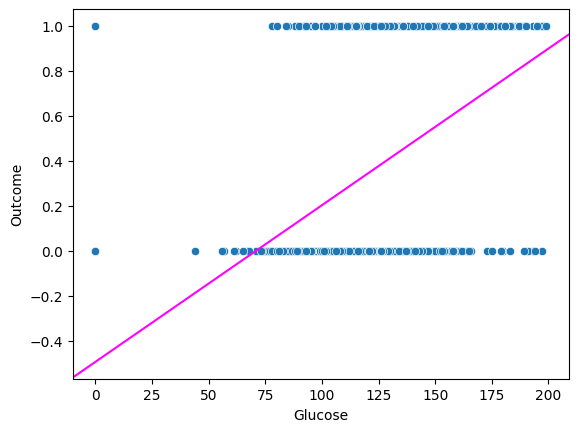

In [32]:
sns.scatterplot(x = 'Glucose',
                y = 'Outcome',
                data = diabetes_df)
plt.axline(xy1 = (0, intercept), slope = slope, color = 'magenta')

lmao OLS regression is garbage for this, because line doesn't... mean anything
- outcomes are binary (YOU NEED CONTINUOUS)
- OLS works only with gradient of data (spread out)

...instead, use: "LOGISTIC REGRESSION" (not seen below, that's more OLS)

In [35]:
# These are just examples of how code works...

# "No" is really "low --> 0" correlation:
age_glucose_no_interaction = ols('Outcome ~ Age + Glucose', data = diabetes_df).fit()
print(age_glucose_no_interaction.params)

Intercept   -0.600748
Age          0.005030
Glucose      0.006473
dtype: float64


Outcome = -0.600748 + 0.005030(age) + 0.006473(glucose)

In [38]:
# ..now with interaction:
age_glucose_with_interaction = ols('Outcome ~ Age * Glucose', data = diabetes_df).fit()
print(age_glucose_with_interaction.params)

Intercept     -0.905058
Age            0.014172
Glucose        0.008923
Age:Glucose   -0.000072
dtype: float64


Outcome = -0.91 + 0.01(age) + .0089(glucose) - .00072(age)(glucose)